In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置出版级绘图风格
plt.rcParams.update({
    # "font.family": "serif",          # 使用衬线字体 (类似 Times New Roman)
    # "font.serif": ["Times New Roman", "DejaVu Serif"],
    "font.size": 14,                 # 全局字号
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.direction": "in",         # 刻度朝内
    "ytick.direction": "in",
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "figure.figsize": (6, 5),        # 图片默认大小
    # "mathtext.fontset": "cm"         # 数学公式使用 Computer Modern 字体
})

Reading data from ../L12imp0J1.6_pair.csv...
Plotting Order Parameters...


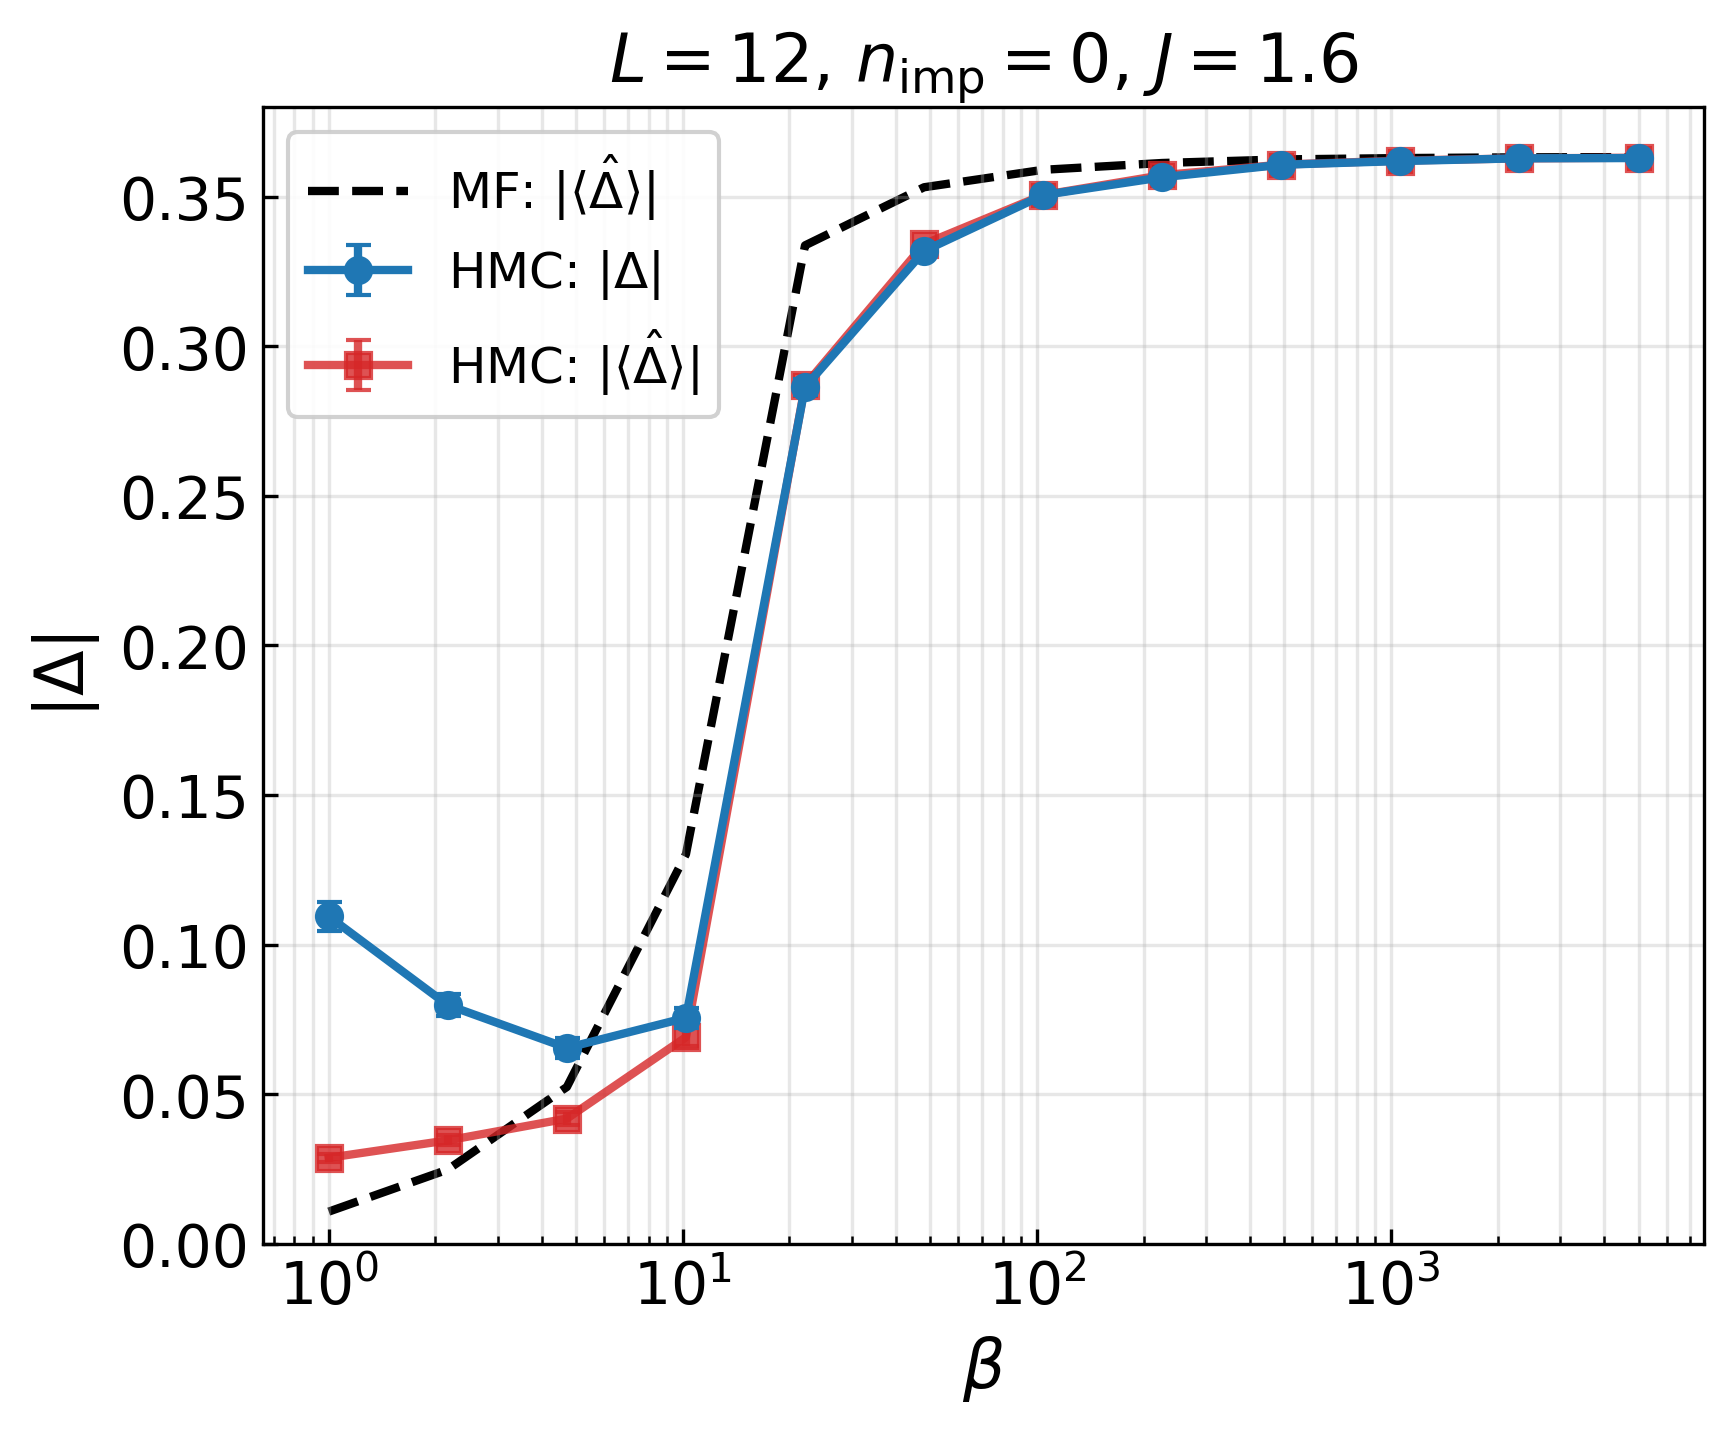

In [59]:
L = 12
J = 1.6
n_imp = 0
csv_file = f"../L{L}imp{n_imp}J{J}_pair.csv"

# ==========================================
# 读取数据
# ==========================================
if not os.path.exists(csv_file):
    print(f"Error: {csv_file} not found.")
    exit(1)

print(f"Reading data from {csv_file}...")
df = pd.read_csv(csv_file)

# 数据列名参考:
# Beta,AccRate,Global,Err_Global,Pair,Err_Pair,RHS,Diff,Err_Diff

# 计算额外的差值列
# Diff_GP = Global - Pair
# Diff_GR = Global - RHS
# 误差传播: sqrt(err1^2 + err2^2)
diff_gp = df['Global'] - df['Pair']
diff_gr = df['Global'] - df['RHS']
err_gp = np.sqrt(df['Err_Global']**2 + df['Err_Pair']**2)

# 定义自定义 X 轴刻度
custom_xticks = [1, 10, 100, 1000]
custom_xticklabels = [r"$10^0$", r"$10^1$", r"$10^2$", r"$10^3$"]

# ==========================================
# 图 1: Order Parameters (Values)
# ==========================================
print("Plotting Order Parameters...")
fig, ax = plt.subplots(dpi=300)

# 1. HMC Global
ax.errorbar(df['Beta'], df['Global'], yerr=df['Err_Global'], 
            fmt='-o', capsize=3, label=r'HMC: $|\Delta|$', color='tab:blue', zorder=3)

# 2. HMC Pair 
ax.errorbar(df['Beta'], df['Pair'], yerr=df['Err_Pair'], 
            fmt='-s', capsize=3, label=r'HMC: $|\langle\hat{\Delta}\rangle|$', color='tab:red', alpha=0.8, zorder=2)

# 3. BCS RHS (理论值 - 线)
ax.plot(df['Beta'], df['RHS'], linestyle='--', color='black', label=r'MF: $|\langle\hat{\Delta}\rangle|$', zorder=1)

# 设置坐标轴
ax.set_xscale('log')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel(r'$|\Delta|$')
ax.set_title(rf'$L={L}$, $n_{{\mathrm{{imp}}}}={n_imp}$, $J={J}$')
ax.set_ylim(0,0.38) 

# 设置刻度
ax.set_xticks(custom_xticks)
ax.set_xticklabels(custom_xticklabels)
ax.grid(True, which="both", ls="-", alpha=0.3) # 网格

# ax.legend(loc='lower right', frameon=True, framealpha=0.9)
ax.legend(loc='best', frameon=True, framealpha=0.9)

plt.tight_layout()
# plt.savefig('py_benchmark_values.png', dpi=output_dpi)
plt.show()